# Machine Learning Project

# Assignment: Perform the following analyses on gum_disease_data.txt 
## The features will be the bacterial species abundances and the classifier will be status. 

## (1) Run a Decision Tree classifier.
## (2) Run a Support Vector Machine analysis.
## The next item is not graded ->
## (3) NOT GRADED (for fun): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow


## Data manipulation and plotting libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # used to generate pairwise plots

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Decision Tree libraries

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## SVM Libraries

In [143]:
from sklearn import svm
from sklearn.svm import LinearSVC

## Read in data set

In [104]:
##DO NOT CHANGE THIS LINE OF CODE
df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## Training set for all analyses

In [88]:
## FIX THIS EXAMPLE 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:6], df['status'], # 1:6 column contain the bacteria features and iloc formats these
                                                        test_size = 0.33, random_state = 100)
# print(X_train, "\n", X_test, "\n", y_train, "\n", y_test)

    strep  prev  lepto  fuso  veil
6    12.3  11.5    9.1   5.5   5.7
46   22.0   6.6    3.2   7.1   6.7
37    5.0  11.5    5.8  17.8   5.3
59    7.9   5.3   21.0  13.4  26.2
50   29.0   3.1   26.6   9.3   9.8
17   14.2   8.3    6.0   8.1   4.9
38    3.9  14.2   13.8  18.5   1.9
60   24.0  29.9   18.9   3.2   4.1
42   61.7   1.7    0.4   2.6   2.4
45    2.9   6.6    4.3  17.1   0.8
30   11.4  15.7   18.6   6.6   3.6
66   19.9   0.0    2.5   0.0   0.1
56   19.1  10.4    9.6   7.0   9.3
40   18.6   2.4   10.3   8.8   6.4
64   39.8   0.7    7.6   0.3   4.5
47    2.7  20.2    8.3  12.5   5.6
7     3.3  24.7    6.3  10.4   3.0
3    15.2   4.2    0.2   2.6   3.4
51    6.4  19.6    5.9  11.8  14.2
62   36.5   1.9   10.8   4.9  10.8
58    2.1  11.0   11.9  11.8   4.4
19    8.1   3.1   11.2  25.0   3.8
13   26.6   3.4   13.9   9.0   4.1
1    26.0   0.0   25.6   0.0   6.3
31    5.3  14.1   15.0  17.1   4.7
4    33.2   2.3    7.4   1.3  12.0
44    1.6   6.9    9.9  10.1   3.1
27   18.8   7.6   18

## Part 1

## Decision Tree Analysis

In [83]:
# creating a decision tree classifier classifier
clf = DecisionTreeClassifier()  

## Generate Decision Tree

In [84]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)


# performing predictions on the test dataset
y_predTree = clf.predict(X_test)

## Show gini prediction

In [89]:
clf.tree_.impurity

array([0.45746528, 0.        , 0.        ])

## Print accuracy

In [90]:
print("ACCURACY OF THE MODEL:", accuracy_score(y_test, y_predTree))


ACCURACY OF THE MODEL: 1.0


## Create dot file of Decision Tree

In [91]:
tree.export_graphviz(clf, out_file="tree.dot")

## Part 2

## Support Vector Machine

## Visualize the first 5 rows of the dataset

In [121]:
df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)

C:\ProgramData\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


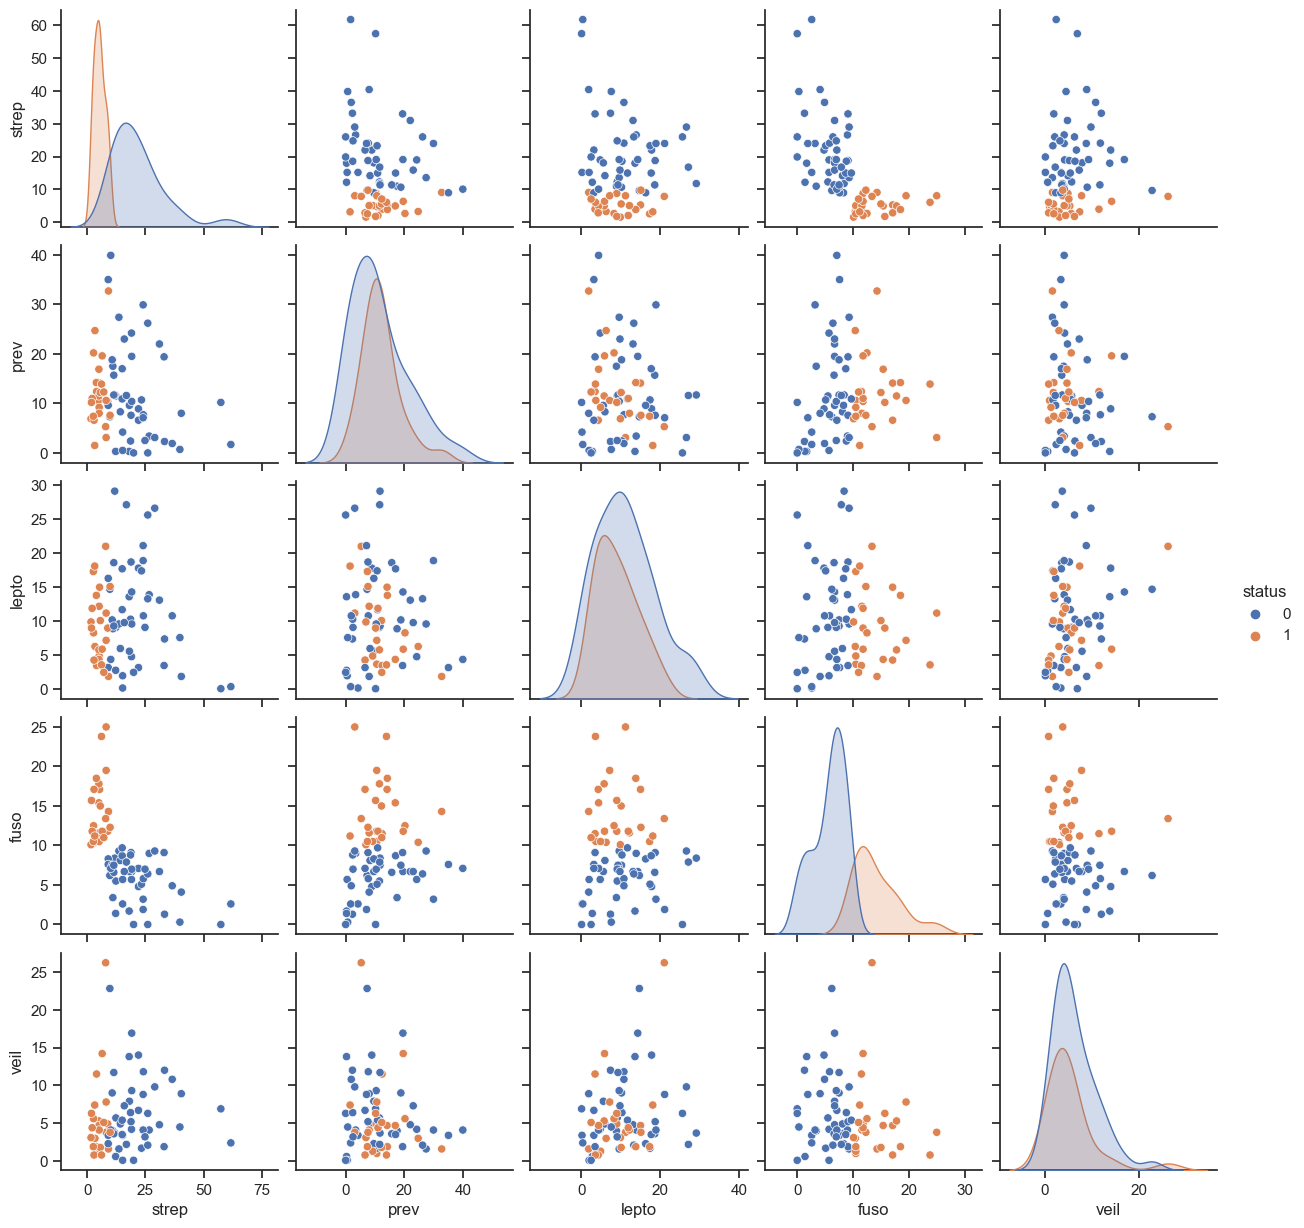

In [135]:
sns.set(style="ticks", color_codes=True) # this line allows the numerical status column to be used for color groupings
sns.pairplot(df, hue='status', vars=['strep', 'prev', 'lepto', 'fuso', 'veil']) # creating pairwise plots for the bacterial features and colored by status 

## Make the training and testing arrays

In [136]:
X = df[['strep','fuso']].values  # Select the first two features for visualization purposes
y = df['status']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y,
                                                        test_size = 0.33, random_state = 100)

# Part A) Non-linear SVM Classifier

My code for this Part A section is based on Geek for Geek's example code for Non-Linear SVM:
https://www.geeksforgeeks.org/ml-non-linear-svm/

## Train the SVM model

In [137]:
mysvmModel = svm.NuSVC()
mysvmModel.fit(X2_train, y2_train) 

NuSVC()

## SVM model predictions on the test data

In [138]:
y_predNonLinear = mysvmModel.predict(X2_test) # the predicted status will be used in the confusion matrix below

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

The output for the following line of code is for a confusion matrix, where the top left number is the number of true positives and the bottom left number is for true negatives

In [139]:
confusion_matrix(y2_test, y_predNonLinear)

array([[15,  0],
       [ 0,  9]], dtype=int64)

## Show Decision Boundary Plot

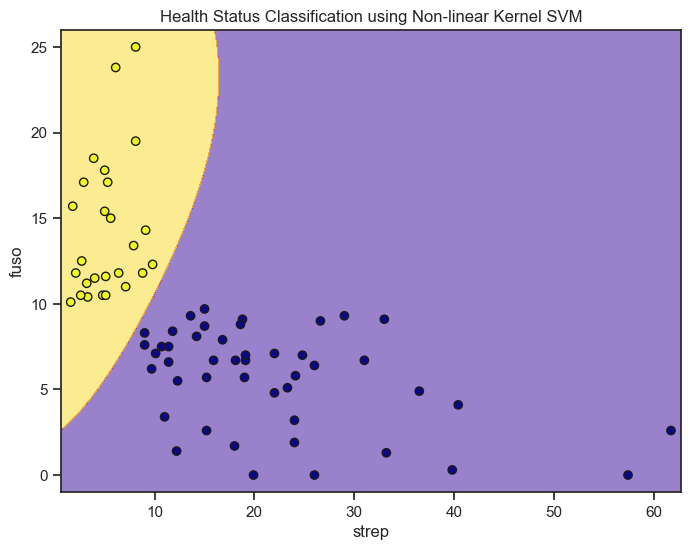

In [140]:
# Create a non-linear kernel SVM classifier
svm = SVC(kernel='poly',degree=5, random_state=42)
svm.fit(X_train, y_train)
 
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = mysvmModel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('strep')
plt.ylabel('fuso')
plt.title('Health Status Classification using Non-linear SVM')
plt.show()

# Part B) Linear SVM Classifier

## Train the linear classifier

In [149]:
myLinearsvmModel = svm.LinearSVC(dual="auto") # the dual argument is needed to suppress a warning
myLinearsvmModel.fit(X2_train, y2_train) # reusing the same training set


LinearSVC(dual='auto')

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

The output for the following line of code is for a confusion matrix, where the top left number is the number of true positives and the bottom left number is for true negatives

In [150]:
y_predLinear = myLinearsvmModel.predict(X2_test) # the predicted status will be used in the confusion matrix below
confusion_matrix(y2_test, y_predLinear)

array([[15,  0],
       [ 0,  9]], dtype=int64)

## Show Precision and Recall scores

In [159]:
print("precision score:",precision_score(y2_test, y_predLinear)) 
print("recall score:",recall_score(y2_test, y_predLinear))

precision score: 1.0
recall score: 1.0


## Show Decision Boundary Plot

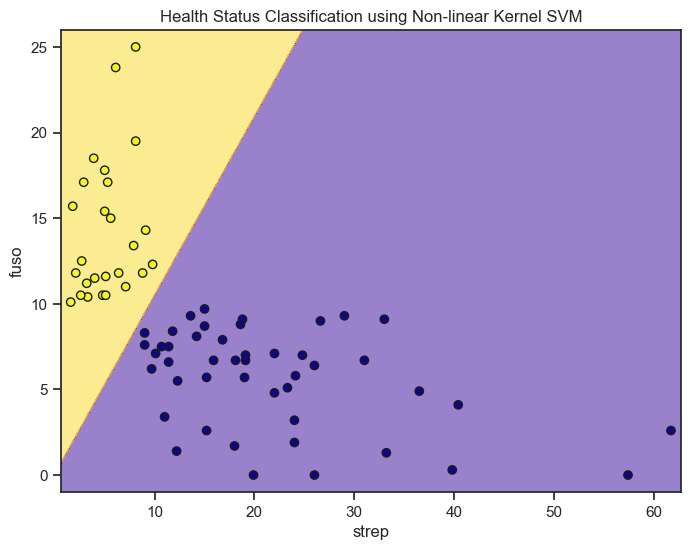

In [160]:
Z = myLinearsvmModel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('strep')
plt.ylabel('fuso')
plt.title('Health Status Classification using Linear SVM')
plt.show()

# Part C) Neural Network extra credit